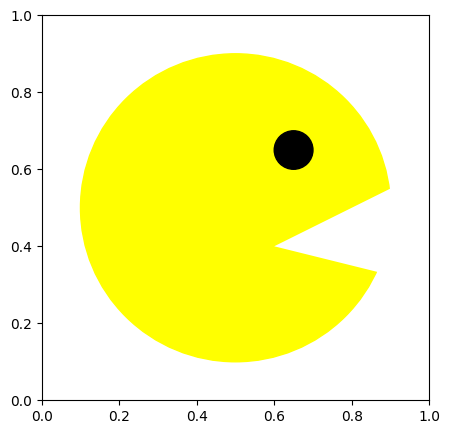

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (5,5))

#body
pacman_circle = plt.Circle((0.5, 0.5), 0.4, color='yellow')
ax.add_artist(pacman_circle)

#eye
eye_x = 0.65
eye_y = 0.65
eye_radius = 0.05
eye_circle = plt.Circle((eye_x, eye_y), eye_radius, color='black')
ax.add_artist(eye_circle)

#triangle
x = [0.6, 1, 1]
y = [0.4, 0.3, 0.6]
ax.fill(x, y, 'white')

#or like this
#vertices = [(0.6, 0.4), (1.0, 0.3), (1.0, 0.6)]
#triangle = plt.Polygon(vertices, closed=True, facecolor='white')
#ax.add_artist(triangle)



ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show()


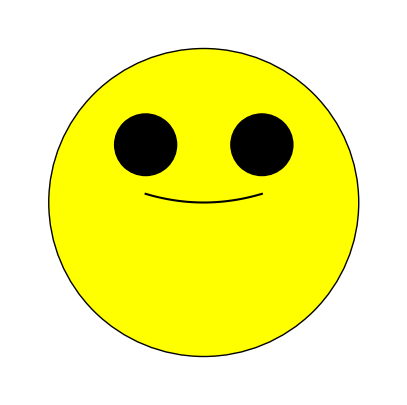

In [52]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (5,5))

smile_circle = plt.Circle((0.5, 0.5), 0.4, color='yellow', ec='black')
ax.add_artist(smile_circle)

left_eye = plt.Circle((0.35, 0.65), 0.08, color='black')
ax.add_artist(left_eye)

right_eye = plt.Circle((0.65, 0.65), 0.08, color='black')
ax.add_artist(right_eye)

x = np.linspace(0.35, 0.65, 100)
y =  (x - 0.5)**2 + 0.5
ax.plot(x, y, color='black')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.axis('off')

plt.show()

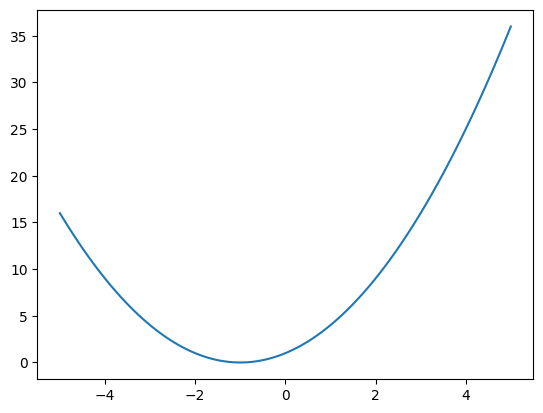

In [55]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2 + 2*x + 1

x = np.linspace(-5, 5, 100)

y = f(x)

plt.plot(x, y)

plt.show()


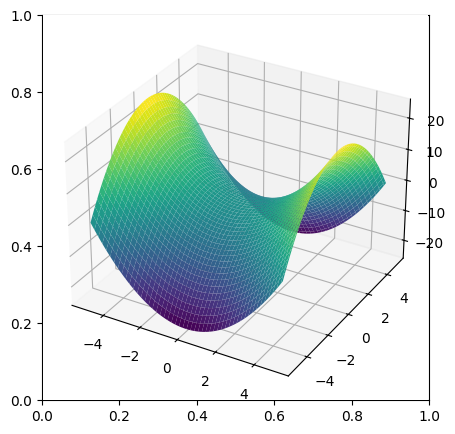

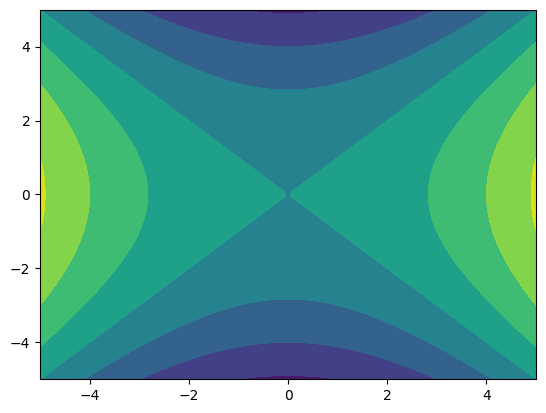

In [79]:
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

def f(x, y):
    return x**2 - y**2

fig, ax = plt.subplots(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
ax.plot_surface(X, Y, Z, cmap='viridis')

plt.show()

plt.contourf(X, Y, Z, cmap=cm.viridis)


In [70]:
import pandas as pd
import numpy as np
class Dataset():
    def __init__(self,df: pd.DataFrame, features: dict):
        self.df = df
        for c,f in features.items():
            if f == "continuous":
                self.df[c] = (self.df[c] - self.df[c].min()) / ( self.df[c].max() - self.df[c].min())
            else:
                self.df[c] = self.df[c].astype("category").cat.codes
        self.feats = features
        
    def __len__(self):
        return len(self.df)
    def get_iter(self, batch_size):
        for i in range(0,len(self.df),batch_size):
            yield self.df.iloc[i:min(i+batch_size, len(self.df))]
            
            